<a href="https://colab.research.google.com/github/J0hnArren/Credit_Scoring/blob/main/PD_jun_ds_Parchiev_Rauf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разработка probability of default модели

<b>Задание:</b> Необходиом разработать модель предсказания дефолта. Даны финансовые данные 32 395 компаний (выручка, активы, пассивы и т.д). Результат будет оцениваться на скрытой выборке из 200 компаний по метрике качества accuracy_score

<b>Цель задания</b> научиться / показать знания в разработке моделей оценки риска - probability of default. Задание приближено к реальному, данные синтетические. Лидерборд для оценки собственного решения и геймификации процесса обучения. Первое место в лидерборде не явлется целью. Цель - правильно разарботанная модель, удовлетворяющая требованиям банковской системы. В случае возникновения вопросов, сотрудники блока Риски готовы проконсультировать и дать обратную связь на модель (телеграм чат).

<b>Метрика качества</b> accuracy_score вычисляется, как ( True positive + True negative ) / Total. Если сабмит-файл, не правильного формата или неверное количество строк, метрика будет = 0.

<b>Время выполнения</b> 1 день

## Импортируем библиотеки

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

from matplotlib import pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_line, geom_point
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Подгружаем данные

In [1]:
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-desc.csv

--2022-11-29 13:57:14--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5329268 (5.1M) [text/plain]
Saving to: ‘PD-data-train.csv’

PD-data-train.csv   100%[===================>]   5.08M  --.-KB/s    in 0.08s   

2022-11-29 13:57:14 (66.3 MB/s) - ‘PD-data-train.csv’ saved [5329268/5329268]

--2022-11-29 13:57:15--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/PD-data-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28259 (28

In [ ]:
train_df = pd.read_csv('PD-data-train.csv', sep=';', low_memory=False)
test_df = pd.read_csv('PD-data-test.csv', sep=';', low_memory=False)
desc_df = pd.read_csv('PD-data-desc.csv', sep=';')

## **Описание данных**

In [ ]:
desc_df

,field,desc_eng,desc_rus
0,ar_revenue,Sales revenue (at the end of the last year),Выручка от реализации (на конец последнего года)
1,ar_total_expenses,Total expenses for the last year,Общие расходы за последний год
2,ar_sale_cost,Cost of sales (at the end of the last year),Себестоимость продаж (на конец последнего года)
3,ar_selling_expenses,Selling expenses (at the end of the last year),Коммерческие расходы (на конец последнего года)
4,ar_management_expenses,Administrative expenses (at the end of the las...,Управленческие расходы (на конец последнего года)
5,ar_sale_profit,Profit from sales (at the end of the last year),Прибыль от реализации (на конец последнего года)
6,ar_balance_of_rvns_and_expns,Balance of income and expenses (at the end of ...,Баланс доходов и расходов (на конец последнего...
7,ar_profit_before_tax,Gross Profit (end of last year),Валовая прибыль (на конец последнего года)
8,ar_taxes,Current income tax (at the end of the last year),Текущий на налог на прибыль (на конец последне...
9,ar_other_profit_and_losses,Other income and expenses (at the end of the l...,Прочие доходы и расходы (на конец последнего г...


Семплы и размеры выборок

In [ ]:
train_df.sample(10)

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
9316,78141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,102,30,30,30,[1-100],11000.0,2,0,0,0,0
6295,52901,19751000.0,18771000.0,18771000.0,0.0,0.0,980000.0,0.0,980000.0,0.0,0.0,980000.0,0.0,6088000.0,4942000.0,1146000.0,0.0,700000.0,980000.0,4699000.0,2089000.0,0.0,2071000.0,18000.0,0.0,98,98,2,2,2,[1-100],100000.0,2,0,0,0,0
9523,79767,58957000.0,57598000.0,44545000.0,13053000.0,0.0,1359000.0,-640000.0,719000.0,838000.0,62000.0,-57000.0,3590000.0,26318000.0,18618000.0,7696000.0,4000.0,2666000.0,-181000.0,19989000.0,12584000.0,0.0,7410000.0,5174000.0,0.0,167,144,30,30,30,[1-100],12000.0,2,0,0,0,0
17599,149107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,82,14,14,14,[1-100],14000.0,2,0,0,0,0
25859,218653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,24,12,12,12,[1-100],10000.0,1,0,0,0,0
15132,128010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,13,13,13,13,[1-100],10000.0,1,0,0,0,0
16426,139329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,43,16,16,16,[1-100],40000.0,1,0,0,0,0
19522,165285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77,77,17,17,17,[1-100],10000.0,1,0,0,0,0
1186,10014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269,137,13,13,13,[1-100],10000.0,1,0,0,0,0
18284,154949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,10000.0,0.0,0.0,0.0,0.0,0.0,12,12,6,6,6,[1-100],10000.0,1,0,0,0,0


In [ ]:
test_df.sample(10)

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg
129,174577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265,15,16,16,16,[1-100],10000.0,1,0,0,0
46,55905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125,125,7,7,7,[1-100],20000.0,2,0,0,0
95,125297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261,37,24,24,24,[1-100],11400.0,3,0,0,0
69,92944,7546000.0,8315000.0,8315000.0,0.0,0.0,-769000.0,-557000.0,-1326000.0,0.0,0.0,-1326000.0,906000.0,3535000.0,315000.0,3220000.0,0.0,1822000.0,-1326000.0,-702000.0,6965000.0,0.0,6863000.0,102000.0,0.0,33,33,11,11,11,[1-100],15000.0,2,0,0,0
19,30403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,102,26,26,26,[1-100],10000.0,1,0,0,0
32,38972,91405000.0,82493000.0,63137000.0,19356000.0,0.0,8912000.0,0.0,8912000.0,559000.0,0.0,8353000.0,4018000.0,20714000.0,20714000.0,0.0,0.0,616000.0,8353000.0,16579000.0,8769000.0,3160000.0,0.0,5609000.0,0.0,209,140,1,1,1,[1-100],125000.0,2,0,0,0
42,52800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170,135,22,22,22,[1-100],10000.0,1,0,0,0
131,174839,75533000.0,74090000.0,74090000.0,0.0,0.0,1443000.0,-1059000.0,384000.0,118000.0,0.0,266000.0,0.0,7164000.0,4268000.0,2896000.0,0.0,6216000.0,266000.0,266000.0,13114000.0,0.0,1483000.0,11631000.0,0.0,44,44,3,3,3,[1-100],14500.0,1,0,0,0
15,27565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,75,23,23,23,[1-100],200000.0,3,0,0,0
48,62713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56,56,1,1,1,[1-100],55000.0,1,0,0,0


## **Исследование данных**

### Обзор

Размерность датасета:

In [ ]:
train_df.shape

(32395, 37)

In [ ]:
train_df.record_id.nunique()

32395

32395 уникальных наблюдений

Посмотрим общие средние для датасета

In [ ]:
train_df.drop('record_id', axis=1).describe()

,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
count,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,1.725000e+04,32395.000000,32395.000000,32395.000000,32395.000000,32395.000000,3.239500e+04,32395.000000,32395.000000,32395.000000,32395.0,32395.000000
mean,8.153776e+07,7.678474e+07,7.320328e+07,2.499198e+06,1.082263e+06,4.753016e+06,-6.424773e+05,4.110538e+06,4.188071e+05,3.937304e+04,3.731104e+06,9.007101e+06,3.044379e+07,1.627389e+07,1.336024e+07,8.096597e+05,1.610857e+06,3.307750e+06,1.911815e+07,2.419023e+07,3.149311e+06,4.983973e+06,1.508316e+07,9.737877e+05,97.121500,78.644822,15.010341,15.010341,15.010341,1.366509e+06,11.946535,0.021670,0.000093,0.0,0.064547
std,1.274402e+08,1.227227e+08,1.156651e+08,1.231798e+07,7.848929e+06,1.941027e+07,6.014715e+06,1.938021e+07,1.565298e+06,4.843389e+05,1.902355e+07,3.642723e+07,6.331020e+07,3.729649e+07,3.851823e+07,8.222404e+06,1.067265e+07,8.895007e+06,4.603456e+07,5.917809e+07,2.764231e+07,1.359236e+07,3.793929e+07,1.493730e+07,75.555398,46.522534,9.546511,9.546511,9.546511,1.502438e+07,86.341847,0.342715,0.009623,0.0,0.245729
min,0.000000e+00,-7.019840e+08,-5.072780e+08,-3.542900e+07,-1.921670e+08,-9.210000e+07,-7.581800e+07,-5.946600e+07,-1.681000e+07,-1.034000e+07,-4.778100e+07,0.000000e+00,0.000000e+00,0.000000e+00,-1.160400e+07,-3.413000e+06,0.000000e+00,-4.780300e+07,-7.501000e+07,0.000000e+00,-3.068000e+06,-2.700000e+06,0.000000e+00,-2.500000e+05,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.0,0.000000
25%,1.019950e+07,9.130250e+06,8.844000e+06,0.000000e+00,0.000000e+00,2.112500e+05,-9.400000e+05,1.420000e+05,0.000000e+00,0.000000e+00,1.010000e+05,0.000000e+00,2.854500e+06,8.100000e+05,4.722500e+05,0.000000e+00,4.100000e+04,9.400000e+04,4.532500e+05,1.634000e+06,0.000000e+00,0.000000e+00,6.722500e+05,0.000000e+00,35.000000,35.000000,6.000000,6.000000,6.000000,1.000000e+04,1.000000,0.000000,0.000000,0.0,0.000000
50%,3.233500e+07,2.970350e+07,2.840800e+07,0.000000e+00,0.000000e+00,1.231500e+06,-1.260000e+05,8.500000e+05,4.100000e+04,0.000000e+00,7.040000e+05,0.000000e+00,1.109450e+07,4.714500e+06,3.028500e+06,0.000000e+00,2.640000e+05,6.730000e+05,3.528000e+06,7.231000e+06,0.000000e+00,3.610000e+05,3.678000e+06,0.000000e+00,79.000000,77.000000,14.000000,14.000000,14.000000,1.000000e+04,1.000000,0.000000,0.000000,0.0,0.000000
75%,8.887675e+07,8.309500e+07,7.991425e+07,0.000000e+00,0.000000e+00,4.574750e+06,0.000000e+00,3.543750e+06,2.910000e+05,0.000000e+00,3.176000e+06,3.490000e+05,3.423000e+07,1.754600e+07,1.200325e+07,0.000000e+00,1.188500e+06,3.025750e+06,1.760775e+07,2.541800e+07,0.000000e+00,3.816750e+06,1.424575e+07,0.000000e+00,137.000000,133.000000,24.000000,24.000000,24.000000,3.000000e+04,2.000000,0.000000,0.000000,0.0,0.000000
max,7.946840e+08,7.949360e+08,7.624930e+08,2.746560e+08,3.023550e+08,1.434511e+09,1.584250e+08,1.481526e+09,5.420200e+07,3.979500e+07,1.485559e+09,1.630344e+09,3.175805e+09,2.890917e+09,1.711586e+09,3.336220e+08,1.271337e+09,2.470140e+08,1.739879e+09,3.349389e+09,2.919676e+09,3.223740e+08,1.820521e+09,1.251578e+09,921.000000,149.000000,33.000000,33.000000,33.000000,1.584979e+09,998.000000,2

Теперь для случая, когда default_12m = 1

In [ ]:
train_df[train_df['default_12m'] == 1].drop('record_id', axis=1).describe()

,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
count,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,7.960000e+02,2091.000000,2091.000000,2091.000000,2091.000000,2091.000000,2.091000e+03,2091.000000,2091.000000,2091.0,2091.0,2091.0
mean,4.718194e+07,4.550537e+07,4.340810e+07,1.353368e+06,7.439008e+05,1.676565e+06,-4.946005e+05,1.181965e+06,1.065578e+05,1.362312e+04,1.089030e+06,4.606804e+06,1.813287e+07,9.253260e+06,8.416191e+06,4.634158e+05,7.603204e+05,1.034433e+06,6.307412e+06,1.738743e+07,2.343863e+06,4.261244e+06,1.058804e+07,1.942802e+05,65.658058,57.190340,13.006217,13.006217,13.006217,2.539653e+05,4.306552,0.002869,0.0,0.0,1.0
std,8.415372e+07,8.195919e+07,7.690806e+07,9.628944e+06,4.359346e+06,5.825144e+06,6.643509e+06,6.314114e+06,6.413649e+05,1.123442e+05,6.219964e+06,2.675213e+07,3.535535e+07,2.028111e+07,1.818844e+07,3.445634e+06,3.094352e+06,6.200849e+06,2.592889e+07,3.738333e+07,1.206501e+07,1.084247e+07,2.586328e+07,2.186492e+06,61.348789,43.044042,9.242685,9.242685,9.242685,1.708369e+06,45.997423,0.053503,0.0,0.0,0.0
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.876600e+07,-7.229600e+07,-2.676700e+07,-3.822000e+06,0.000000e+00,-2.290600e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.362800e+07,-2.579300e+07,0.000000e+00,-3.068000e+06,-1.190000e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.0,0.0,1.0
25%,2.997750e+06,2.894500e+06,2.747750e+06,0.000000e+00,0.000000e+00,6.200000e+04,-6.915000e+05,3.100000e+04,0.000000e+00,0.000000e+00,2.175000e+04,0.000000e+00,1.053750e+06,2.537500e+05,1.355000e+05,0.000000e+00,5.000000e+03,2.175000e+04,6.425000e+04,6.772500e+05,0.000000e+00,0.000000e+00,1.907500e+05,0.000000e+00,23.000000,22.000000,5.000000,5.000000,5.000000,1.000000e+04,1.000000,0.000000,0.0,0.0,1.0
50%,1.444500e+07,1.306600e+07,1.249100e+07,0.000000e+00,0.000000e+00,5.115000e+05,-6.450000e+04,2.650000e+05,1.300000e+04,0.000000e+00,2.055000e+05,0.000000e+00,5.644500e+06,2.199000e+06,1.736000e+06,0.000000e+00,5.450000e+04,1.925000e+05,6.230000e+05,4.065500e+06,0.000000e+00,1.350000e+05,2.182000e+06,0.000000e+00,44.000000,43.000000,11.000000,11.000000,11.000000,1.000000e+04,1.000000,0.000000,0.0,0.0,1.0
75%,5.036650e+07,4.861175e+07,4.593725e+07,0.000000e+00,0.000000e+00,1.816250e+06,0.000000e+00,1.034250e+06,1.090000e+05,0.000000e+00,9.310000e+05,0.000000e+00,1.944125e+07,8.991500e+06,8.322750e+06,0.000000e+00,3.892500e+05,8.815000e+05,3.603500e+06,1.527400e+07,0.000000e+00,3.147500e+06,9.582250e+06,0.000000e+00,92.000000,88.000000,22.000000,22.000000,22.000000,2.000000e+04,2.000000,0.000000,0.0,0.0,1.0
max,7.715910e+08,7.552490e+08,7.552490e+08,1.833780e+08,5.276800e+07,9.365100e+07,1.584250e+08,1.196590e+08,1.433900e+07,1.895000e+06,1.199470e+08,4.856340e+08,3.527900e+08,2.197350e+08,2.036690e+08,3.886000e+07,4.988500e+07,1.199460e+08,4.784530e+08,3.742600e+08,2.393820e+08,1.032460e+08,3.030650e+08,5.819800e+07,299.000000,146.000000,33.000000,33.000000,33.000000,4.580657e+07,998.000000,1.000000,0.0,0.0,1.0


Затем для случая, когда default_12m = 0, то есть компания не объявила дефолт

In [ ]:
train_df[train_df['default_12m'] == 0].drop('record_id', axis=1).describe()

,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg,default_12m
count,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,1.645400e+04,30304.000000,30304.000000,30304.000000,30304.000000,30304.000000,3.030400e+04,30304.000000,30304.000000,30304.000000,30304.0,30304.0
mean,8.319980e+07,7.829795e+07,7.464469e+07,2.554630e+06,1.098632e+06,4.901846e+06,-6.496312e+05,4.252215e+06,4.339129e+05,4.061876e+04,3.858921e+06,9.219976e+06,3.103936e+07,1.661353e+07,1.359942e+07,8.264100e+05,1.652003e+06,3.417727e+06,1.973790e+07,2.451933e+07,3.188277e+06,5.018937e+06,1.530062e+07,1.011498e+06,99.292503,80.125198,15.148627,15.148627,15.148627,1.443276e+06,12.473700,0.022967,0.000099,0.0,0.0
std,1.289368e+08,1.241584e+08,1.170250e+08,1.243088e+07,7.978854e+06,1.982087e+07,5.982750e+06,1.978389e+07,1.594954e+06,4.952676e+05,1.942114e+07,3.681817e+07,6.429628e+07,3.789395e+07,3.922000e+07,8.384454e+06,1.090490e+07,8.990495e+06,4.670009e+07,6.001335e+07,2.817797e+07,1.371072e+07,3.841460e+07,1.528581e+07,75.960033,46.389141,9.551771,9.551771,9.551771,1.552468e+07,88.425656,0.354026,0.009949,0.0,0.0
min,0.000000e+00,-7.019840e+08,-5.072780e+08,-3.542900e+07,-1.921670e+08,-9.210000e+07,-7.581800e+07,-5.946600e+07,-1.681000e+07,-1.034000e+07,-4.778100e+07,0.000000e+00,0.000000e+00,0.000000e+00,-1.160400e+07,-3.413000e+06,0.000000e+00,-4.780300e+07,-7.501000e+07,0.000000e+00,-3.068000e+06,-2.700000e+06,0.000000e+00,-2.500000e+05,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.0,0.0
25%,1.074200e+07,9.541250e+06,9.201500e+06,0.000000e+00,0.000000e+00,2.232500e+05,-9.590000e+05,1.540000e+05,0.000000e+00,0.000000e+00,1.090000e+05,0.000000e+00,2.978000e+06,8.582500e+05,5.000000e+05,0.000000e+00,4.500000e+04,1.030000e+05,5.062500e+05,1.701250e+06,0.000000e+00,0.000000e+00,7.090000e+05,0.000000e+00,37.000000,36.000000,6.000000,6.000000,6.000000,1.000000e+04,1.000000,0.000000,0.000000,0.0,0.0
50%,3.335750e+07,3.056000e+07,2.948800e+07,0.000000e+00,0.000000e+00,1.287000e+06,-1.300000e+05,9.030000e+05,4.400000e+04,0.000000e+00,7.445000e+05,0.000000e+00,1.141900e+07,4.898000e+06,3.107000e+06,0.000000e+00,2.770000e+05,7.105000e+05,3.821500e+06,7.376500e+06,0.000000e+00,3.730000e+05,3.793000e+06,0.000000e+00,82.000000,80.000000,14.000000,14.000000,14.000000,1.000000e+04,1.000000,0.000000,0.000000,0.0,0.0
75%,9.009250e+07,8.458250e+07,8.174950e+07,0.000000e+00,0.000000e+00,4.756000e+06,0.000000e+00,3.762000e+06,3.047500e+05,0.000000e+00,3.344250e+06,4.130000e+05,3.507625e+07,1.814500e+07,1.230000e+07,0.000000e+00,1.230000e+06,3.209750e+06,1.848750e+07,2.598425e+07,0.000000e+00,3.871750e+06,1.455050e+07,0.000000e+00,138.000000,134.000000,24.000000,24.000000,24.000000,3.000000e+04,2.000000,0.000000,0.000000,0.0,0.0
max,7.946840e+08,7.949360e+08,7.624930e+08,2.746560e+08,3.023550e+08,1.434511e+09,1.050430e+08,1.481526e+09,5.420200e+07,3.979500e+07,1.485559e+09,1.630344e+09,3.175805e+09,2.890917e+09,1.711586e+09,3.336220e+08,1.271337e+09,2.470140e+08,1.739879e+09,3.349389e+09,2.919676e+09,3.223740e+08,1.820521e+09,1.251578e+09,921.000000,149.000000,33.000000,33.000000,33.000000,1.584979e+09,998.000000,20.000000,1.000000,0.0,0.0


Видно, что некоторые фичи значительно отличаются в зависимости от того, дефолнула ли компания. Учту это, когда буду отбирать наиболее важные фичи для обучения.

Уровень дефолт-рейта в выборке = 6,7219%

In [ ]:
train_df['default_12m'].values.mean()

0.06454699799351751

Посмотрим наглядно, как распределены компании по дефолту в процентном соотношении

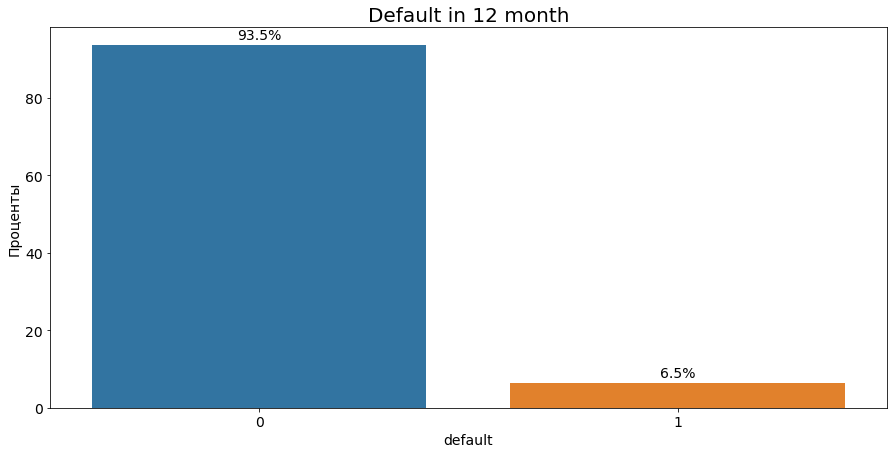

In [ ]:
# нормирование на размер датасета
norm_target = (train_df
               .default_12m
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# Вывод значений над графиками - annotate()
# В цикле смотрим каждый столбец графика и на нем отмечаем значения
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center', # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points', # точка смещения относительно координаты
                fontsize=14)

plt.title('Default in 12 month', fontsize=20)

plt.xlabel('default', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

Виден сильный дисбаланс классов. В дальнейшем это обязательно нужно учесть

Проверим, есть ли недостающие или аномальные данные и какого типа сами значения

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32395 entries, 0 to 32394
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   record_id                     32395 non-null  int64  
 1   ar_revenue                    17250 non-null  float64
 2   ar_total_expenses             17250 non-null  float64
 3   ar_sale_cost                  17250 non-null  float64
 4   ar_selling_expenses           17250 non-null  float64
 5   ar_management_expenses        17250 non-null  float64
 6   ar_sale_profit                17250 non-null  float64
 7   ar_balance_of_rvns_and_expns  17250 non-null  float64
 8   ar_profit_before_tax          17250 non-null  float64
 9   ar_taxes                      17250 non-null  float64
 10  ar_other_profit_and_losses    17250 non-null  float64
 11  ar_net_profit                 17250 non-null  float64
 12  ab_immobilized_assets         17250 non-null  float64
 13  a

Финансовые данные имеют очень много пропусков, что довольно плохо. Посмотрим, сколько это в процентном соотношении для лучшего понимания

In [ ]:
df_null = pd.DataFrame({'Count': train_df.isnull().sum(), 
                        'Percent': 100*train_df.isnull().sum()/len(train_df)})

df_null[df_null['Count'] > 0] 

,Count,Percent
ar_revenue,15145,46.751042
ar_total_expenses,15145,46.751042
ar_sale_cost,15145,46.751042
ar_selling_expenses,15145,46.751042
ar_management_expenses,15145,46.751042
ar_sale_profit,15145,46.751042
ar_balance_of_rvns_and_expns,15145,46.751042
ar_profit_before_tax,15145,46.751042
ar_taxes,15145,46.751042
ar_other_profit_and_losses,15145,46.751042


Печально! Множество строк имеют одинаковый процент пропуска равный 46.751042%

Дальше буду думать, как можно заполнить эти пропуски, либо отказаться от таких данных вовсе, при использовании столбцов с пропусками

Посмотрим на количество разных типов фичей

In [ ]:
train_df.dtypes.value_counts()

float64    25
int64      11
object      1
dtype: int64

Посмотрим на единственный object

In [ ]:
train_df['ul_staff_range'].unique()

array(['[1-100]', '(100-500]', '> 500'], dtype=object)

Эту переменную позже заменим на обычную int64 (на 1, 2 и 3), для большей однородности данных.

### **Чистка данных**

Проверим некоторые столбцы

In [ ]:
print((train_df['head_actual_age'].equals(train_df['cap_actual_age'])))
print(train_df['cap_actual_age'].equals(train_df['adr_actual_age']))
print((train_df['cap_actual_age'].equals(train_df['head_actual_age'])))

True
True
True


In [ ]:
train_df['ul_systematizing_flg'].sum() == 0 

True

Заметим, что:

    adr_actual_age, head_actual_age и cap_actual_age  -  всегда совпадают, их можно объединить и заменить на общую переменную manager_age
    ul_systematizing_flg (Системообразующая компания) - всегда равен 0 и не имеет знечения

Также в качестве индекса можно использовать встроенный *record_id*, но ввиду того, что он идет не по порядку, пока что откажусь от него

Проверим тестовую выборку

In [ ]:
test_df.head()

,record_id,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,adr_actual_age,head_actual_age,cap_actual_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg,ul_systematizing_flg
0,196,39103000.0,38913000.0,38913000.0,0.0,0.0,190000.0,141000.0,331000.0,284000.0,0.0,47000.0,0.0,6009000.0,2451000.0,3558000.0,0.0,677000.0,47000.0,1178000.0,6130000.0,0.0,3000000.0,3130000.0,0.0,156,135,3,3,3,[1-100],100000.0,1,0,0,0
1,1196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,216,138,5,5,5,[1-100],100000.0,1,0,0,0
2,2813,54174000.0,50929000.0,50929000.0,0.0,0.0,3245000.0,-1278000.0,1967000.0,500000.0,0.0,1467000.0,0.0,8175000.0,8037000.0,138000.0,0.0,237000.0,1467000.0,6835000.0,3906000.0,0.0,0.0,3906000.0,0.0,244,138,20,20,20,[1-100],250000.0,2,0,0,0
3,4385,1904000.0,1679000.0,1679000.0,0.0,0.0,225000.0,-88000.0,137000.0,0.0,0.0,137000.0,0.0,5790000.0,4314000.0,1476000.0,0.0,35000.0,137000.0,5691000.0,540000.0,0.0,500000.0,40000.0,0.0,272,139,9,9,9,[1-100],10000.0,2,0,0,0
4,6479,225584000.0,210685000.0,210685000.0,0.0,0.0,14899000.0,-12715000.0,2184000.0,445000.0,0.0,1739000.0,0.0,65485000.0,46006000.0,19479000.0,0.0,956000.0,1739000.0,12408000.0,47017000.0,0.0,16215000.0,30802000.0,0.0,254,139,3,3,3,(100-500],1700598.0,84,0,0,0


In [ ]:
test_df.shape

(200, 36)

In [ ]:
print((test_df['head_actual_age'].equals(test_df['cap_actual_age'])))
print(test_df['cap_actual_age'].equals(test_df['adr_actual_age']))
print((test_df['cap_actual_age'].equals(test_df['head_actual_age'])))

True
True
True


In [ ]:
test_df['ul_systematizing_flg'].sum() == 0 

True

Здесь все аналогично

Почистим датафреймы

In [ ]:
#modified version of dataset
train_mod = train_df.drop(['record_id', 'head_actual_age', 'cap_actual_age', 'ul_systematizing_flg'], axis=1).copy()
test_mod = test_df.drop(['record_id', 'head_actual_age', 'cap_actual_age', 'ul_systematizing_flg'], axis=1).copy()

train_mod['ul_staff_range'] = np.where((train_mod.ul_staff_range == '[1-100]'), 1, train_mod.ul_staff_range)
train_mod['ul_staff_range'] = np.where((train_mod.ul_staff_range == '(100-500]'), 2, train_mod.ul_staff_range)
train_mod['ul_staff_range'] = np.where((train_mod.ul_staff_range == '> 500'), 3, train_mod.ul_staff_range)
train_mod[['ul_staff_range']] = train_mod[['ul_staff_range']].astype(np.int64)

test_mod['ul_staff_range'] = np.where((test_mod.ul_staff_range == '[1-100]'), 1, test_mod.ul_staff_range)
test_mod['ul_staff_range'] = np.where((test_mod.ul_staff_range == '(100-500]'), 2, test_mod.ul_staff_range)
test_mod['ul_staff_range'] = np.where((test_mod.ul_staff_range == '> 500'), 3, test_mod.ul_staff_range)
test_mod[['ul_staff_range']] = test_mod[['ul_staff_range']].astype(np.int64)

In [ ]:
train_mod.rename(columns={'adr_actual_age': 'manager_age'}, inplace=True)
test_mod.rename(columns={'adr_actual_age': 'manager_age'}, inplace=True)
test_mod.sample(10)

,ar_revenue,ar_total_expenses,ar_sale_cost,ar_selling_expenses,ar_management_expenses,ar_sale_profit,ar_balance_of_rvns_and_expns,ar_profit_before_tax,ar_taxes,ar_other_profit_and_losses,ar_net_profit,ab_immobilized_assets,ab_mobile_current_assets,ab_inventory,ab_accounts_receivable,ab_other_current_assets,ab_cash_and_securities,ab_losses,ab_own_capital,ab_borrowed_capital,ab_long_term_liabilities,ab_short_term_borrowing,ab_accounts_payable,ab_other_borrowings,bus_age,ogrn_age,manager_age,ul_staff_range,ul_capital_sum,ul_founders_cnt,ul_branch_cnt,ul_strategic_flg
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,75,23,1,200000.0,3,0,0
147,0.0,0.0,0.0,0.0,0.0,0.0,-8000.0,-8000.0,0.0,0.0,-8000.0,0.0,819000.0,0.0,819000.0,0.0,3000.0,-8000.0,2000.0,820000.0,0.0,820000.0,0.0,0.0,18,18,7,1,10000.0,2,0,0
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,66,26,1,10000.0,1,0,0
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116,116,1,1,10000.0,1,0,0
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,3,1,10000.0,2,0,0
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250,140,2,2,10000.0,1,0,0
31,59741000.0,58165000.0,58165000.0,0.0,0.0,1576000.0,0.0,1576000.0,362000.0,0.0,1214000.0,0.0,8560000.0,6678000.0,1882000.0,0.0,399000.0,1214000.0,7190000.0,8955000.0,0.0,6907000.0,2048000.0,0.0,229,139,9,1,156000.0,1,0,0
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62,62,28,1,20000.0,2,0,0
154,8544000.0,7813000.0,7813000.0,0.0,0.0,731000.0,-195000.0,536000.0,112000.0,0.0,424000.0,0.0,2172000.0,2154000.0,18000.0,0.0,37000.0,424000.0,1511000.0,830000.0,0.0,0.0,830000.0,0.0,75,75,17,1,10000.0,2,0,0
163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,66,3,1,16800.0,2,0,0


## Отбор фичей

Теперь составим списки разных типов фичей для их отбора

In [ ]:
# take only important main features (imf)
all_features = ['ar_revenue', 'ar_total_expenses', 'ar_sale_cost', 
            'ar_selling_expenses', 'ar_management_expenses', 
            'ar_sale_profit', 'ar_balance_of_rvns_and_expns', 
            'ar_profit_before_tax', 'ar_taxes', 'ar_other_profit_and_losses', 
            'ar_net_profit', 'ab_immobilized_assets', 'ab_mobile_current_assets', 
            'ab_inventory', 'ab_accounts_receivable', 'ab_other_current_assets', 
            'ab_cash_and_securities', 'ab_losses', 'ab_own_capital', 
            'ab_borrowed_capital', 'ab_long_term_liabilities', 
            'ab_short_term_borrowing', 'ab_accounts_payable', 
            'ab_other_borrowings', 'bus_age', 'ogrn_age', 'manager_age', 
            'ul_staff_range', 'ul_capital_sum', 'ul_founders_cnt', 
            'ul_branch_cnt', 'ul_strategic_flg', 'default_12m']


part_null_features = ['ar_revenue', 'ar_total_expenses', 'ar_sale_cost', 
            'ar_selling_expenses', 'ar_management_expenses', 
            'ar_sale_profit', 'ar_balance_of_rvns_and_expns', 
            'ar_profit_before_tax', 'ar_taxes', 'ar_other_profit_and_losses', 
            'ar_net_profit', 'ab_immobilized_assets', 'ab_mobile_current_assets', 
            'ab_inventory', 'ab_accounts_receivable', 'ab_other_current_assets', 
            'ab_cash_and_securities', 'ab_losses', 'ab_own_capital', 
            'ab_borrowed_capital', 'ab_long_term_liabilities', 
            'ab_short_term_borrowing', 'ab_accounts_payable', 
            'ab_other_borrowings']

non_null_features = ['bus_age', 'ogrn_age', 'manager_age', 
            'ul_staff_range', 'ul_capital_sum', 'ul_founders_cnt', 
            'ul_branch_cnt', 'ul_strategic_flg', 'default_12m']


imf_features = ['ar_revenue', 
            'ar_selling_expenses', 'ar_management_expenses', 
            'ar_balance_of_rvns_and_expns', 
            'ar_profit_before_tax', 'ar_taxes', 'ar_other_profit_and_losses', 
            'ab_immobilized_assets', 
            'ab_accounts_receivable', 'ab_other_current_assets', 
            'ab_cash_and_securities', 'ab_losses', 'ab_own_capital', 
            'ab_borrowed_capital', 'ab_long_term_liabilities', 
            'ab_short_term_borrowing', 'ab_accounts_payable', 
            'ab_other_borrowings', 'bus_age', 'manager_age', 
            'ul_staff_range', 'ul_capital_sum', 'ul_founders_cnt', 
            'ul_branch_cnt', 'ul_strategic_flg', 'default_12m']

imf_train = train_mod[non_null_features].copy()
imf_test = test_mod[non_null_features[:-1]].copy()

In [ ]:
imf_train.dtypes

bus_age               int64
ogrn_age              int64
manager_age           int64
ul_staff_range        int64
ul_capital_sum      float64
ul_founders_cnt       int64
ul_branch_cnt         int64
ul_strategic_flg      int64
default_12m           int64
dtype: object

### Карта корреляции

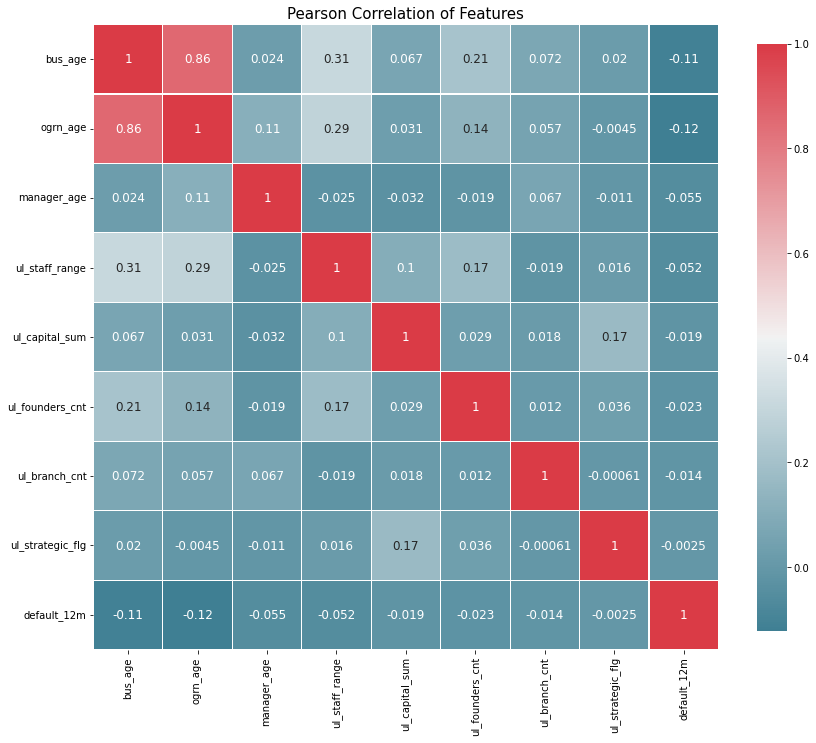

In [ ]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(imf_train)

## **Первая попытка построить модель**

In [ ]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split

In [ ]:
X = imf_train.loc[:, imf_train.columns != 'default_12m'].copy()
y = imf_train['default_12m'].copy()

In [ ]:
X.columns

Index(['bus_age', 'ogrn_age', 'manager_age', 'ul_staff_range',
       'ul_capital_sum', 'ul_founders_cnt', 'ul_branch_cnt',
       'ul_strategic_flg'],
      dtype='object')

In [ ]:
# split the df into train and test, it is important these two do not communicate during the training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# this means we will train on 80% of the data and test on the remaining 20%.

Проверим схожесть целевых переменных

In [ ]:
#check that the target is not far off
print(imf_train['default_12m'].describe())
print("---------------------------")
print(y_train.describe())
print("---------------------------")
print(y_test.describe())

count    32395.000000
mean         0.064547
std          0.245729
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_12m, dtype: float64
---------------------------
count    25916.000000
mean         0.065442
std          0.247309
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_12m, dtype: float64
---------------------------
count    6479.000000
mean        0.060966
std         0.239287
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: default_12m, dtype: float64


In [ ]:
#create the classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=42) 
# training the classifier
classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)
# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

0.9356382157740392

Неплохой рузультат для начала, но как понять, что выставлены наилучшие параметры?

Насколько я понял, лучший способ получить оптимальные параметры заключается в использовании **GridSearchCV**. Он просматривает все различные параметры, которые вводятся в таблицу параметров, и выдает наилучшую комбинацию параметров, основанную на выбранном показателе оценки (accuracy, f1 и т.д.) 

Но, чем больше я усложню сетку, тем больше времени будет занимать весь процесс, потому что она запускает ее каждый раз с разной комбинацией параметров. Поэтому воздержусь от слишком сложных экспериментов.

Попробую поработать со следюущими параметрами:

* criterion - может быть gini (измеряет, как часто случайно выбранный элемент будет неправильно идентифицирован) или entropy (измеряет информацию, содержащуюся в каждом атрибуте, таким образом, мы оцениваем снижение энтропии из-за сортировки по атрибуту)
* max depth - это максимальное количество шагов, которые должно выполнить дерево
* max leaf nodes - максимальное количество узлов. Этот параметр используется для создания дерева с max_leaf_nodes наиболее оптимальным способом.
* min sample split - ограничение, чтобы остановить дальнейшее разделение, полезно для предотвращения переобучения

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# define the parameters grid
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [10,20,30,40],
             'min_samples_split': [5, 10, 20]}

# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10, scoring= 'accuracy')
# the cv option will be clear in a few cells

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
print(grid_tree.best_estimator_)
#with its score
print(np.abs(grid_tree.best_score_))

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=40,
                       min_samples_split=20)
0.9348279717064294


Теперь попробуем с новыми параметрами

In [ ]:
#create the classifier
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=6, 
                                    max_leaf_nodes=40, min_samples_split=20, 
                                    random_state=42) 
# training the classifier
classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)
# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

0.9390338015125791

Получилось совсем чуть-чуть лучше. Но можно попробовать еще одно улучшение, а именно кросс-валидацию. На самом деле она как бы уже включена в GridSearch, но я не очень понимаю, как оно работает, что является отличным поводом попробовать другой инстумент из sklearn - **Kfold**.

K-Folds cross-validation - это статистический метод, используемый для оценки модели машинного обучения на независимых данных.

Общая процедура заключается в следующем:

    1. Перемешиваем датасет случайным образом
    2. Разделите датасет на k-групп
    3. Для каждой уникальной выборки:
        * Берем группу в качестве тестирования датасета
        * Берем остальные группы в качестве выборки учебных данных
        * Готовим модель на обучаемых выборках и оцениваем ее на тестовой выборке
        * Сохраняем оценку модели и отбрасываем модель
    4. Обобщаем параметры качества модели с помощью выборки оценки моделей

In [ ]:
from sklearn.model_selection import KFold

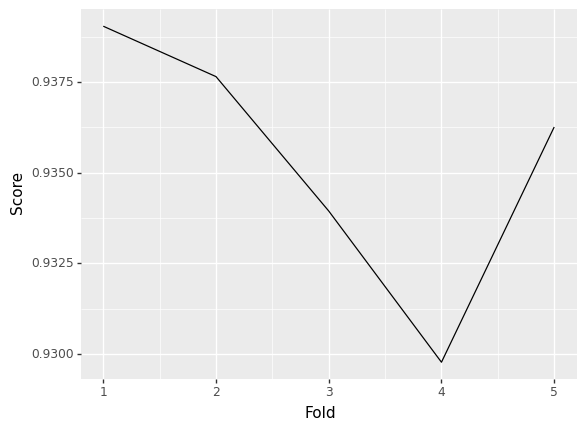

In [ ]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

fold = []
scr = []
new_features = imf_train.columns[:-1] # все фичи, кроме целевой переменной

for i,(train_index, test_index) in enumerate(kf.split(imf_train)):
    training = imf_train.iloc[train_index,:]
    valid = imf_train.iloc[test_index,:]
    feats = training[new_features] 
    label = training['default_12m'] # целвая переменная
    valid_feats = valid[new_features]
    valid_label = valid['default_12m']
    classifier.fit(feats,label) # it is the last one we run, the best one
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance = pd.DataFrame({'Score':scr,'Fold':fold})
# let's see what we have with ggplot
g = ggplot(performance, aes(x='Fold',y='Score')) + geom_point() +geom_line()
print(g)

Сейчас это мало что значит, поскольку это всего лишь одна модель, и, в зависимости от того, как мы разделяем датасет на train и test, мы получим разную точность, которая может иметь или не иметь значение, в зависимости от назначения модели. Однако, далее я сравню разные модели, чтобы найти более стабильную, и, я надеюсь, этот небольшой эксперимент будет полезен.

### Важность фичей

Ниже мы можем видеть, насколько важны отобранные фичи для этой модели.

In [ ]:
def get_feature_importance(clsf, ftrs):
    imp = clsf.feature_importances_.tolist()
    feat = ftrs
    result = pd.DataFrame({'feat':feat,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

get_feature_importance(classifier, new_features)

,feat,score
0,bus_age,0.546395
4,ul_capital_sum,0.116265
5,ul_founders_cnt,0.114674
1,ogrn_age,0.105235
2,manager_age,0.100275
3,ul_staff_range,0.017155
6,ul_branch_cnt,0.000000
7,ul_strategic_flg,0.000000


Можем вывести наглядно полученное выше дерево

In [ ]:
# from sklearn import tree
# import graphviz
# dot_data = tree.export_graphviz(classifier, out_file=None)  
# graph = graphviz.Source(dot_data)  
# graph

### Оценим F1 Score

Вообще, возвращаясь к балансу целевой переменной, в нашем наборе данных уровень дефолт-рейта в выборке = 6,7219%, поэтому, если я создам модель, которая просто присваивает 0 default_12m, я просто получу около 93% точности. В этом смысле accuracy может быть вводящим в заблуждение показателем качества нашей модели.

Более хорошим показателем является оценка f1, которая учитывает ложноположительные результаты, ложноотрицательные результаты и т.д.

Итак, мы определяем precision как TP / (TP + FP) и recall как TP / (TP + FN), и можем получить F1 = 2 (Prec Rec) / (Prec + Rec)

Также добавим параметр stratify, возможно это поможет с несбалансированностью целевой переменной

In [ ]:
# import the tool
from sklearn.metrics import f1_score
#recreate the model and evaluate it
X = imf_train.loc[:, imf_train.columns != 'default_12m'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)
classifier.fit(X_train, y_train) #same classifier as before
predictions = classifier.predict(X_test)
f1_score(y_true=y_test, y_pred=predictions)

0.1870653685674548

Интересный результат :)

Посмотрим значения наглядно, чтобы понять, почему так получилось

In [ ]:
# True Positive (TP): we predict a label of 1 (positive), and the true label is 1.
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
 
# True Negative (TN): we predict a label of 0 (negative), and the true label is 0.
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
 
# False Positive (FP): we predict a label of 1 (positive), but the true label is 0.
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
 
# False Negative (FN): we predict a label of 0 (negative), but the true label is 1.
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
 
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

TP: 267, FP: 2169, TN: 3892, FN: 151


### Decision Tree Classifier

Добавим параметр 'class_weight' : ['balanced'] к нашему набору

In [ ]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [10,20,30,40],
             'min_samples_split': [5, 10, 20],
             'class_weight' : ['balanced']}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'f1')
grid_tree.fit(X_train, y_train)
best = grid_tree.best_estimator_
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))
classifier = best
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print("-------------")
print(f1_score(y_true = y_test, y_pred = predictions))
print(get_feature_importance(classifier, new_features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_leaf_nodes=20, min_samples_split=5)
0.17649688005224434
-------------
0.16893132574366507
               feat     score
0           bus_age  0.690695
4    ul_capital_sum  0.148891
2       manager_age  0.091204
5   ul_founders_cnt  0.055976
1          ogrn_age  0.013234
3    ul_staff_range  0.000000
6     ul_branch_cnt  0.000000
7  ul_strategic_flg  0.000000
-------------
TP: 230, FP: 2098, TN: 3986, FN: 165


И проверим старый добрый accuracy

In [ ]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.6391418428769872

In [ ]:
tree_normal = DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, max_leaf_nodes=20, min_samples_split=5)

Теперь результат гораздо больше похож на реальный. Нужно лучше поработать над данными и моделью.

## Ещё немного работы над данными

Мне в голову пришло несколько техник по устранению дисбаланса в дефолт-рейте:
* Сделать апсэмплинг до класса большинства
* Сделать доунсемплинг до класса меньшинства
* Сделать синтетический образец датасета

In [ ]:
from sklearn.utils import resample

In [ ]:
# Separate majority and minority classes
df_majority = imf_train[imf_train.default_12m==0].copy()
df_minority = imf_train[imf_train.default_12m==1].copy()

print(df_majority.default_12m.count())
print("-----------")
print(df_minority.default_12m.count())
print("-----------")
print(imf_train.default_12m.value_counts())

30304
-----------
2091
-----------
0    30304
1     2091
Name: default_12m, dtype: int64


In [ ]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=30304,    # to match majority class
                                 random_state=422) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.default_12m.value_counts()

0    30304
1    30304
Name: default_12m, dtype: int64

In [ ]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2091,     # to match minority class
                                 random_state=422) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.default_12m.value_counts()

0    2091
1    2091
Name: default_12m, dtype: int64

Недостаток расширенной выборки заключается в увеличении вероятности переобучения, поскольку она повторяет событие класса меньшинства.

Понижающая выборка может отбросить потенциально полезную информацию, и выборка может быть предвзятой, но это помогает увеличить время выполнения.

Итак, теперь у нас есть 3 тренировочных набора:

* Обычные X_train, y_train, с их дисбалансом и их подлинностью 
* df_upsample, который сбалансирован, но подвержен риску
переобучения 
* df_downsample, который будет быстрым, но также потенциально бесполезным с точки зрения предсказуемости (набор тестов даже больше, чем он)

## **Выбор алгоритма**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [ ]:
# classifier list for the normal training set
clf_list = [DecisionTreeClassifier(max_depth = 3, class_weight = "balanced"), 
            RandomForestClassifier(n_estimators = 100, class_weight = "balanced"), 
            AdaBoostClassifier(DecisionTreeClassifier(max_depth = 3, class_weight = "balanced"),
                               n_estimators = 100), 
            GradientBoostingClassifier(), 
            XGBClassifier()
           ]
# the parameters are set in order to have the same kind of tree every time

Используем KFold для оценки обычных данных

0
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
1
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
2
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
3
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
4
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier


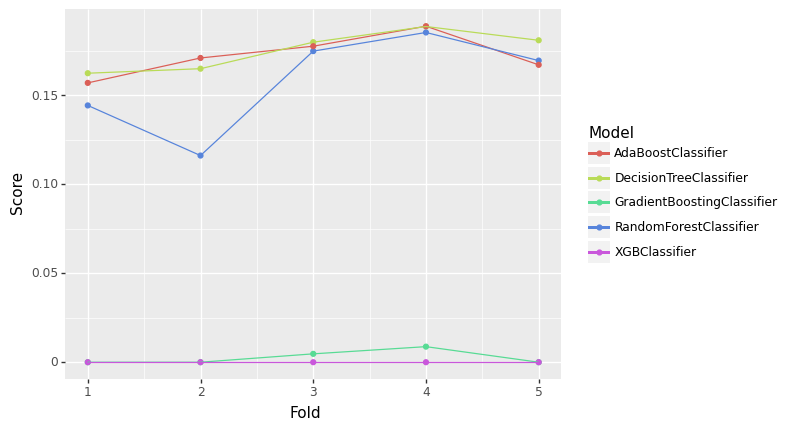

In [ ]:
# use Kfold to evaluate the normal training set
kf = KFold(n_splits=5, random_state=42, shuffle=True)

mdl = []
fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(imf_train)):
    training = imf_train.iloc[train_index,:]
    valid = imf_train.iloc[test_index,:]
    print(i)
    for clf in clf_list:
        model = clf.__class__.__name__
        feats = training[new_features] #defined above
        label = training['default_12m']
        valid_feats = valid[new_features]
        valid_label = valid['default_12m']
        clf.fit(feats,label) 
        pred = clf.predict(valid_feats)
        score = f1_score(y_true = valid_label, y_pred = pred)
        fold.append(i+1)
        scr.append(score)
        mdl.append(model)
        print(model)
    
#create a small df with the scores
performance = pd.DataFrame({'Model': mdl, 'Score':scr,'Fold':fold})
g_normal = ggplot(performance,aes(x='Fold',y='Score',group = 'Model',color = 'Model')) + geom_point() + geom_line()
print(g_normal)

Используем KFold для оценки дополненных данных

0
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
1
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
2
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
3
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
4
DecisionTreeClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier


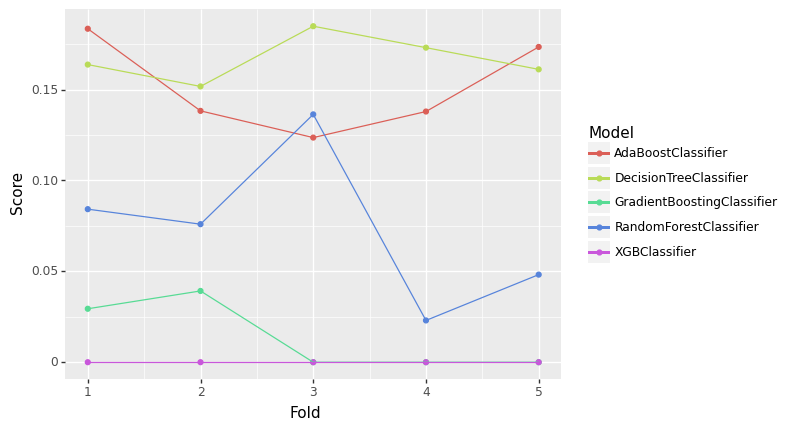

In [ ]:
# use Kfold to evaluate the upsampled training set
kf = KFold(n_splits=5,random_state=42,shuffle=True)

mdl = []
fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_downsampled)):
    training = imf_train.iloc[train_index,:]
    valid = imf_train.iloc[test_index,:]
    print(i)
    for clf in clf_list:
        model = clf.__class__.__name__
        feats = training[new_features] #defined above
        label = training['default_12m']
        valid_feats = valid[new_features]
        valid_label = valid['default_12m']
        clf.fit(feats,label) 
        pred = clf.predict(valid_feats)
        score = f1_score(y_true = valid_label, y_pred = pred)
        fold.append(i+1)
        scr.append(score)
        mdl.append(model)
        print(model)
    
#create a small df with the scores
performance = pd.DataFrame({'Model': mdl, 'Score':scr,'Fold':fold})
g_downsampled = ggplot(performance,aes(x='Fold',y='Score',group = 'Model',color = 'Model')) + geom_point() + geom_line()
print(g_downsampled)

In [ ]:
y_upsampled = df_upsampled.default_12m
X_upsampled = df_upsampled.drop(['default_12m'], axis= 1)

### Ada Boost Classifier с разными наборами данных

In [ ]:
# normal training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(class_weight = "balanced")), 
                        param_grid, scoring = acc_scorer, cv=5)
%time grid_ada = grid_ada.fit(X_train, y_train)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_normal = grid_ada.best_estimator_

CPU times: user 10min 38s, sys: 1.45 s, total: 10min 40s
Wall time: 10min 41s
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                   learning_rate=0.5, n_estimators=200)
0.1737003224457032


In [ ]:
ada_normal = AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight='balanced'),
                   learning_rate=0.5, n_estimators=200)

In [ ]:
# upsampled training set
param_grid = {'n_estimators': [200,300],
              'algorithm': ['SAMME', 'SAMME.R'],
              'learning_rate' : [0.5, 0.75, 1.0]}
acc_scorer = make_scorer(f1_score)
grid_ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(class_weight = "balanced")), 
                        param_grid, scoring = acc_scorer, cv=5)
%time grid_ada = grid_ada.fit(X_upsampled, y_upsampled)
print(grid_ada.best_estimator_)
print(grid_ada.best_score_)
ada_upsampled = grid_ada.best_estimator_

In [ ]:
ada_upsampled = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=300, random_state=None)

### Decision Tree Classifier с дополненным датасетом

In [ ]:
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [10,20,30,40],
             'min_samples_split': [5, 10, 20],
             'class_weight' : ['balanced']}
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5, scoring= 'f1')
grid_tree.fit(X_upsampled, y_upsampled)
best = grid_tree.best_estimator_
print(grid_tree.best_estimator_)
print(np.abs(grid_tree.best_score_))
classifier = best
classifier.fit(X_upsampled, y_upsampled)
predictions = classifier.predict(X_test)
print("-------------")
print(f1_score(y_true = y_test, y_pred = predictions))
print(get_feature_importance(classifier, new_features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
print('TP: {}, FP: {}, TN: {}, FN: {}'.format(TP,FP,TN,FN))

DecisionTreeClassifier(class_weight='balanced', max_depth=7, max_leaf_nodes=40,
                       min_samples_split=5)
0.6648537538067705
-------------
0.16625310173697272
               feat     score
0           bus_age  0.598680
2       manager_age  0.115605
5   ul_founders_cnt  0.097507
1          ogrn_age  0.077418
4    ul_capital_sum  0.072219
3    ul_staff_range  0.038571
6     ul_branch_cnt  0.000000
7  ul_strategic_flg  0.000000
-------------
TP: 268, FP: 2561, TN: 3523, FN: 127


In [ ]:
tree_upsampled = DecisionTreeClassifier(class_weight='balanced', max_depth=7, max_leaf_nodes=40,
                       min_samples_split=5)

### Random Forest Classifier

In [ ]:
# normal training set
param_grid = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced'], 'n_jobs' : [-1]} #use all the computational power you have
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_train, y_train)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_normal = grid_forest.best_estimator_

CPU times: user 1min 48s, sys: 10.9 s, total: 1min 58s
Wall time: 7min 41s
RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1)
0.1583969945277534


In [ ]:
forest_normal = RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1)

In [ ]:
# upsampled training set
param_grid = {'n_estimators': [200, 400, 600, 1000],
              'criterion': ['entropy', 'gini'], 'n_jobs' : [-1]}
acc_scorer = make_scorer(f1_score)
grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
%time grid_forest = grid_forest.fit(X_upsampled, y_upsampled)
print(grid_forest.best_estimator_)
print(grid_forest.best_score_)
forest_upsampled = grid_forest.best_estimator_

CPU times: user 3min 32s, sys: 15.9 s, total: 3min 48s
Wall time: 16min 59s
RandomForestClassifier(n_estimators=400, n_jobs=-1)
0.9280370767785691


In [ ]:
forest_upsampled = RandomForestClassifier(n_estimators=400, n_jobs=-1)

## Тренировка и тестирование

### Decision Tree

Посмотрим результаты на нормальном и дополненом датасетах

In [ ]:
# Normal sample training
%time tree_normal.fit(X_train, y_train)
predictions = tree_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(tree_normal, new_features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

CPU times: user 47.7 ms, sys: 4 µs, total: 47.7 ms
Wall time: 79.8 ms
-------------
f1 score: 0.169
Accuracy: 0.651
-------------
               feat     score
0           bus_age  0.669443
4    ul_capital_sum  0.148891
2       manager_age  0.091204
5   ul_founders_cnt  0.055976
1          ogrn_age  0.034487
3    ul_staff_range  0.000000
6     ul_branch_cnt  0.000000
7  ul_strategic_flg  0.000000
-------------
True Positives: 230
False Positive: 2098
True Negative: 3986
False Negative: 165
Precision: 0.1
Recall: 0.58
Problematic ratio: 0.42


In [ ]:
# Upsample training
%time tree_normal.fit(X_upsampled, y_upsampled)
predictions = tree_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(tree_normal, new_features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

CPU times: user 147 ms, sys: 1.99 ms, total: 149 ms
Wall time: 158 ms
-------------
f1 score: 0.164
Accuracy: 0.631
-------------
               feat     score
0           bus_age  0.626588
4    ul_capital_sum  0.124472
5   ul_founders_cnt  0.118403
2       manager_age  0.108955
1          ogrn_age  0.021582
3    ul_staff_range  0.000000
6     ul_branch_cnt  0.000000
7  ul_strategic_flg  0.000000
-------------
True Positives: 235
False Positive: 2230
True Negative: 3854
False Negative: 160
Precision: 0.1
Recall: 0.59
Problematic ratio: 0.41


### Random Forest

Посмотрим результаты на нормальном и дополненом датасетах

In [ ]:
# Normal sample training
%time forest_normal.fit(X_train, y_train)
predictions = forest_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(forest_normal, new_features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

CPU times: user 6.24 s, sys: 37 ms, total: 6.28 s
Wall time: 5.72 s
-------------
f1 score: 0.148
Accuracy: 0.862
-------------
               feat     score
2       manager_age  0.287906
0           bus_age  0.239521
1          ogrn_age  0.222847
4    ul_capital_sum  0.166506
5   ul_founders_cnt  0.066373
3    ul_staff_range  0.013970
6     ul_branch_cnt  0.002864
7  ul_strategic_flg  0.000013
-------------
True Positives: 78
False Positive: 578
True Negative: 5506
False Negative: 317
Precision: 0.12
Recall: 0.2
Problematic ratio: 0.8


In [ ]:
# Upsample training
%time forest_upsampled.fit(X_upsampled, y_upsampled)
predictions = forest_upsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(forest_upsampled, new_features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

CPU times: user 26.2 s, sys: 245 ms, total: 26.4 s
Wall time: 14 s
-------------
f1 score: 0.515
Accuracy: 0.887
-------------
               feat     score
2       manager_age  0.281617
0           bus_age  0.239291
1          ogrn_age  0.216029
4    ul_capital_sum  0.181464
5   ul_founders_cnt  0.063682
3    ul_staff_range  0.014871
6     ul_branch_cnt  0.003031
7  ul_strategic_flg  0.000014
-------------
True Positives: 391
False Positive: 731
True Negative: 5353
False Negative: 4
Precision: 0.35
Recall: 0.99
Problematic ratio: 0.01


### Ada Boost

Посмотрим результаты на нормальном и дополненом датасетах

In [ ]:
# Normal sample training
%time ada_normal.fit(X_train, y_train)
predictions = ada_normal.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(ada_normal, new_features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

CPU times: user 1.65 s, sys: 3.94 ms, total: 1.65 s
Wall time: 1.67 s
-------------
f1 score: 0.156
Accuracy: 0.834
-------------
               feat     score
2       manager_age  0.272772
0           bus_age  0.235845
1          ogrn_age  0.216434
4    ul_capital_sum  0.177384
5   ul_founders_cnt  0.081399
3    ul_staff_range  0.014011
6     ul_branch_cnt  0.002156
7  ul_strategic_flg  0.000000
-------------
True Positives: 99
False Positive: 777
True Negative: 5307
False Negative: 296
Precision: 0.11
Recall: 0.25
Problematic ratio: 0.75


In [ ]:
# Upsample training
%time ada_upsampled.fit(X_upsampled, y_upsampled)
predictions = ada_upsampled.predict(X_test)
print("-------------")
print("f1 score: {}".format(round(f1_score(y_true = y_test, y_pred = predictions),3)))
print("Accuracy: {}".format(round(accuracy_score(y_true = y_test, y_pred = predictions),3)))
print("-------------")
print(get_feature_importance(ada_upsampled, new_features))
print("-------------")
TP = np.sum(np.logical_and(predictions == 1, y_test == 1))
TN = np.sum(np.logical_and(predictions == 0, y_test == 0))
FP = np.sum(np.logical_and(predictions == 1, y_test == 0))
FN = np.sum(np.logical_and(predictions == 0, y_test == 1))
pred = len(predictions)

print('True Positives: {}'.format(TP))
print('False Positive: {}'.format(FP))
print('True Negative: {}'.format(TN))
print('False Negative: {}'.format(FN))
print('Precision: {}'.format(round(TP/(TP+FP),2)))
print('Recall: {}'.format(round(TP/(TP+FN),2)))
print('Problematic ratio: {}'.format(round(FN/(FN+TP),2)))

CPU times: user 20.8 s, sys: 165 ms, total: 20.9 s
Wall time: 21.2 s
-------------
f1 score: 0.173
Accuracy: 0.602
-------------
               feat     score
4    ul_capital_sum  0.416667
5   ul_founders_cnt  0.240000
0           bus_age  0.206667
1          ogrn_age  0.086667
2       manager_age  0.040000
3    ul_staff_range  0.006667
6     ul_branch_cnt  0.003333
7  ul_strategic_flg  0.000000
-------------
True Positives: 270
False Positive: 2453
True Negative: 3631
False Negative: 125
Precision: 0.1
Recall: 0.68
Problematic ratio: 0.32


### Итог

Немного неожиданно для меня наилучший результат был получен на доплненой выборке с Random Forest. Его пока что возьму за итоговый, который отправится на сайт с соревнованием. 

Также не успел показать тут уменьшенную выборку, но она давала более низкую точность и в целях экономии времени, я не включил ее в работу. А с "синтетичекой выборкой" вовсе не успел((. 

### Формирование файла с ответом

In [ ]:
answ_df = test_df[['record_id']].copy()

In [ ]:
answ_df['id'] = answ_df['record_id']

In [ ]:
answ_df.drop('record_id',axis=1, inplace=True)

In [ ]:
answ_df['predict'] = forest_upsampled.predict(imf_test.loc[:,imf_test.columns.values])
answ_df.sample(15)

,id,predict
3,4385,0
120,165984,1
189,260260,0
140,188227,0
0,196,0
38,47190,0
171,239686,0
177,248523,1
195,265577,0
101,131839,0


In [ ]:
answ_df.to_csv('PD-submit.csv',index=False, sep=';')

"Для загрузки своего рузультата на https://dsbattle.com/hackathons/juniords-new/ вам нужно создать csv файл с двумя колонками (id, predict), разделитель - точка с запятой (;)"

Загрузить не получилось, так как сначала csv файл просто не загружался на сайт, а затем туда стало невозможно залогиниться. Однако, очень хотелось бы узнать свой скор в таблице. В телеграм чате мне подсказали, что достаточно просто отправить этот ноутбук на почту.

# **Вывод✅**

   Полученные результаты, безусловно, не очень хороши. Однако, в условиях ограниченного времени (удалось отвести задаче всего лишь неполных 2 дня), я постарался максильно наглядно показать ход моих мыслей и действий во время работы над этой задачей и провести как можно больше экспериментов с данными и моделями. Ко всему прочему, некоторые ограничения производительности коллаба тоже немного затормозили мою работу (особенно в выборе параметров).

   Многое из задуманного, я еще не реализовал. Из того, что было на уме, в первую очередь, нужно гораздо больше времени уделить предобработке данных, а именно: 

1.   Погрузиться в предметную область задачи и лучше проработать задачу, поняв, что именно необходимо бизнесу.

2.   Разобраться с пропусками в данных. Есть несколько подходов, которые я хотел бы применить: попробовать отказаться от строк с пропусками вовсе, попробовать заменить их на средние или мпутация данных с помощью алгоритма k-NN.

3.   Лучше обработать момент с мультиколлинеарностью, которая присутствует между многими фичами в датасете, так как много фичей сильно коррелируют друг с другом.

4.   Понять, какие фичи действительно важны для модели, а какие можно не учитывать.

5.   Проверить данные на выбросы.

6.   Вывести больше графиков и боксплотов для лучшего и более наглядного представления данных.

7.   Лучше устранить дисбаланс целевой переменной. Найти несколько способов и проэкспериментировать (на момент выполнения на уме был алгоритм SMOTE из библиотеки imblearn.over_sampling, с которым можно было бы создать еще один модифицированный датасет).

Все это уже могло бы значительно улучшить качество конечных предсказайний. Но также отмечу, что в такой задаче однозначно нужно поэкспериментировать больше с моделями, изучить, какие еще можно применить (тот же GradientBoostingClassifier) и конечно же использовать больше метрик и нагляднее их визуализировать.

Несмотря на то, что в работе я использовал очень простые модели и не успел достаточно качественно углубиться в то, как их улучшить, я вижу, что правильное постановка задачи и качественное понимание конкретной банковской сферы данной задачи, помогло бы значительно улучшить результат. Например, если банк заинтересован в том, чтобы предсказать дефолт кредитуемых им компаний, возможно, было бы лучше использовать модель с меньшим уклоном в ложноотрицательные результаты (false negative). Однако, если банк (а это, скорее всего, так) затем вложит ресурсы для предотвращения дефолта компаний, роль ложных положительных (false positive) будет становиться все более и более значительной.

Другими словами, здесь я оценил все с помощью в целом хорошего показателя (оценка f1). Таким образом, было бы неплохо самому определить функцию потерь, которая правильно учитывала бы TP, FP, TN и FN, и обучала мои модели максильно оптимально.

Я понял немало нового пока работал над этой задачей, в том числе и то, что можно улучшить в моем решении и что мне необходимо изучить больше материала по этой теме, которая действительно показалась мне интересной и бросающей хороший вызов моим скиллам. Считаю, что время я однозначно провел с пользой.

P.S. Извиняюсь за какое-то количество очепяток, здесь они не подсвечиваются.